<a href="https://colab.research.google.com/github/NataliaRusinchuk/Numerical-methods-for-students/blob/main/Numerical%20Methods%201.1%20Solving%20the%20nonlinear%20equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class for equation and all methods

In [ ]:
from ctypes import ArgumentError
from scipy.misc import derivative
from typing import Callable, Tuple, Any
import matplotlib.pyplot as plt
import numpy as np
import math


class Non_line_func():
  def __init__ (self, func : Callable[[float], float], diff):
    """
    func - function setted by the equation func(x)=0
    diff - derivative of func, if does not exist =None
    """
    self.func = func
    self.diff = diff

  @property
  def __methods(self):
    return {
        "bisection" : self.bisection,
        "secant" : self.secant,
        "newton" : self.newton,
        "simple_newton" : self.simple_newton
    }
  

  def derivative (self, x:float):
    if self.diff:
      return self.diff(x)
    else:
      # derivative - numerical derivative of func via x
      # 0.001 = dx, defines the error of numerical derivative
      return derivative(self.func, x, 0.001)

  def __find_interval(
    self,
    h : float, 
    x0 : float, 
    xn : float, 
    print_result : bool = False
    ) -> dict:
      """
      Function for search the intervals and roots of the equation
      ----
      Parameters
      h : float
          Step of checking the interval with a root
      x0 : float
          Point for start of checking
      xn : float
          Point for end of checking
      function : Callable[[float], float]
          Function of the equation f(x)=0
      print_result : bool
          Default = False
          Define to print or not results
      ----
      Returns
      answer : dict = {"roots" : [], "intervals" : []}
          roots: root value if finded
          intervals: interval with the root in the form (x_start, x_end)
      """
      # Find number of ranges
      # Round to the higher value
      n : int = math.ceil((xn - x0) / h)
      answer : dict = {"roots" : [], "intervals" : []}
      # Check of all the intervals
      x_i = x0
      x_i1 = x0 + h
      y_i = self.func(x_i)
      y_i1 = self.func(x_i1)
      for i in range(n):
        # Check if the root is in the interval
        # In this case signs of function should differ at the edges of the interval
        if y_i * y_i1 < 0:
          answer["intervals"].append((x_i, x_i1))
        elif y_i == 0:
          answer["roots"].append(x_i)
        x_i, x_i1 = x_i1, x_i1 + h
        y_i, y_i1 = y_i1, self.func(x_i1)
      # Printing the results if needed
      if answer["roots"] != [] and print_result:
        print(f"{len(answer['roots'])} roots were found")
      if answer["intervals"] != [] and print_result:
        print(f"{len(answer['intervals'])} intervals were found")
      return answer

  def bisection(
      self,
      edges : Tuple[float, float], 
      error : float,  
      maxiter : int, 
  ) -> Tuple[float, int, list, list]:
    """
    Function for searching the solution 
    of nonlinear equation
    by the bisection method
    ----
    Parameters
    edges : Tuple[float, float]
            edges of the interval with solution 
    error : float
            error of the solution  
    maxiter : int
            maximal number of iterations
    ----
    Returns
    x_root: float
            root of the equation 
    n_iter: int
            number of iterations needed
    errors: list
            list of errors of the variable for each iteration 
    residuals: list
            list of residuals of the variable for each iteration 
    """
    errors = []
    residual = []
    xl, xr = edges
    # Zero approximation
    x_0 = (xr + xl) / 2
    x_root = x_0
    yroot = self.func(x_root)
    for i in range(maxiter): # int i = 0, i < maxiter, i++
      yl = self.func(xl)
      if yroot == 0:
        break
      elif yl * yroot < 0:
        xr = x_root
      else:
        xl = x_root
      x_0 = x_root
      x_root = (xr + xl) / 2
      yroot = self.func(x_root)
      errors.append(abs(x_root - x_0))
      residual.append(abs(yroot))
      if residual[-1] < error:
        break
    return (x_root, i+1, errors, residual)

  def newton(self, edges : Tuple[float, float], error, maxiter):
    """
    Function for searching the solution 
    of nonlinear equation
    by the Newton method
    ----
    Parameters
    edges : Tuple[float, float]
            edges of the interval with solution 
    error : float
            error of the solution  
    maxiter : int
            maximal number of iterations
    ----
    Returns
    x_root: float
            root of the equation 
    n_iter: int
            number of iterations needed
    errors: list
            list of errors of the variable for each iteration 
    residuals: list
            list of residuals of the variable for each iteration 
    """
    errors = []
    residual = []
    xl, xr = edges;
    x_0 = (xr + xl) / 2
    x_root = x_0
    for i in range(maxiter):
      x_root = x_0 - self.func(x_0)/ self.derivative(x_0)
      errors.append(abs(x_root - x_0))
      residual.append(abs(self.func(x_root)))
      if residual[-1] < error:
        break
      x_0 = x_root
    return (x_root, i+1, errors, residual)
  

  def secant(self, edges : Tuple[float, float], error, maxiter):
    """
    Function for searching the solution 
    of nonlinear equation
    by the secant method
    ----
    Parameters
    edges : Tuple[float, float]
            edges of the interval with solution 
    error : float
            error of the solution  
    maxiter : int
            maximal number of iterations
    ----
    Returns
    x_root: float
            root of the equation 
    n_iter: int
            number of iterations needed
    errors: list
            list of errors of the variable for each iteration 
    residuals: list
            list of residuals of the variable for each iteration 
    """
    errors = []
    residual = []
    xl, xr = edges
    x_0 = xl
    X1 = xl - self.func(xl)*(xr - xl) / (self.func(xr) - self.func(xl))
    for i in range(maxiter):
      x_root = x_0 - self.func(x_0)*(X1 - x_0) / (self.func(X1) - self.func(x_0))
      errors.append(abs(x_root - x_0))
      residual.append(abs(self.func(x_root)))
      if residual[-1] < error:
        break
      x_0 = X1
      X1 = x_root
    return (x_root, i+1, errors, residual)


  def simple_newton(self, edges : Tuple[float, float], error, maxiter):
    """
    Function for searching the solution 
    of nonlinear equation
    by the simple Newton method
    ----
    Parameters
    edges : Tuple[float, float]
            edges of the interval with solution 
    error : float
            error of the solution  
    maxiter : int
            maximal number of iterations
    ----
    Returns
    x_root: float
            root of the equation 
    n_iter: int
            number of iterations needed
    errors: list
            list of errors of the variable for each iteration 
    residuals: list
            list of residuals of the variable for each iteration 
    """
    errors = []
    residual = []
    xl, xr = edges;
    x_0 = (xr + xl) / 2
    x_root = x_0
    L = self.derivative(x_0)
    for i in range(maxiter):
      x_root = x_0 - self.func(x_0)/ L
      errors.append(abs(x_root - x_0))
      residual.append(abs(self.func(x_root)))
      if residual[-1] < error:
        break
      x_0 = x_root
    return (x_root, i+1, error, residual)


  def find_roots(
    self,
    method : str,
    h : float = 1,
    x0 : float = -10,
    xn : float = 10,
    error : float = 1e-6,
    maxiter : int = 1000,
    plot_graphs : bool = False  
  ) -> list:
    """
    Method for searching the roots 
    of the nonlinear equation
    ----
    Parameters
    method : str
        one of the available methods for solution
        "bisection", "secant", "newton", "simple_newton"
    h : float = 1
        step for searching the interval
    x0 : float = -10
        start point for the search of the solution
    xn : float = 10
        end point for the search of the solution
    error : float = 1e-6
        residual of the function for stopping the iterations
    maxiter : int = 1000
        maximal number of iterations
    plot_graphs : bool = False
        define if need to plot graph of the method convergence
    ---
    Returns
    List of roots have been found
    """
    if method not in self.__methods:
      raise ArgumentError("Method does not exist.\nPlease, choose one of these: bisection, newton, secant, simple_iter")
    else:
      answer = self.__find_interval(h, x0, xn)
      for i in range(len(answer["intervals"])):
        root = self.__methods[method](answer["intervals"][i], error, maxiter)
        answer["roots"].append(root[0])
        if plot_graphs:
          fig, graphs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
          n_iters = root[1]
          y_labels = ('Error of the variable', 'Residual')
          plt.subplots_adjust(top = 0.85)
          fig.suptitle(f'Сonvergence of the {method} method\nfor root x={root[0]:.2f}', 
              y = 1, 
              verticalalignment='top',
              weight = 'bold',
              fontsize = 15, 
              linespacing = 1.5)
          for i in (0, 1):
            graphs[i].plot(np.arange(n_iters), root[2+i])
            graphs[i].set_xlabel('Number of the iteration')
            graphs[i].set_ylabel(y_labels[i])
            graphs[i].set_xlim(0, n_iters)
            graphs[i].set_xticks(np.arange(n_iters))
            graphs[i].grid()
      print(f"{len(answer['roots'])} roots were found")
      for i in range(len(answer['roots'])):
        print(answer['roots'][i])
      return answer['roots']
  

# Тестування

In [ ]:
# 4sinx = 0
task_1 = Non_line_func(lambda x: np.sin(x)*4, lambda x: 4*np.cos(x))
task_2 = Non_line_func(lambda x: np.sin(x)*4, None)

In [ ]:
print(math.pi)
task_1.bisection((3.1, 3.2), 1e-6, 1000)

3.141592653589793


(3.141592407226563,
 14,
 [0.025000000000000355,
  0.012500000000000178,
  0.006250000000000089,
  0.0031250000000002665,
  0.0015625000000003553,
  0.0007812500000001776,
  0.0003906250000000888,
  0.00019531250000026645,
  9.765624999991118e-05,
  4.8828124999733546e-05,
  2.4414062500088818e-05,
  1.2207031250266454e-05,
  6.103515624911182e-06,
  3.0517578122335465e-06],
 [0.06636756891739162,
  0.01637056865842121,
  0.00862937894709644,
  0.003870613755129118,
  0.0023793855005072744,
  0.0007456143548543535,
  0.0008168856351498876,
  3.5635640826574755e-05,
  0.00035498935870661053,
  0.00015967685913125573,
  6.202060917082406e-05,
  1.319248417221939e-05,
  1.1221578327386702e-05,
  9.85452921532755e-07])

In [ ]:
task_2.newton((3.1, 3.2), 1e-6, 1000)

In [ ]:
task_2.secant((3.1, 3.2), 1e-6, 1000)

In [ ]:
task_1.simple_newton((3.1, 3.2), 1e-6, 1000)

7 roots were found
0
-9.42477798461914
-6.2831854820251465
-3.141592502593994
3.141592502593994
6.2831854820251465
9.42477798461914



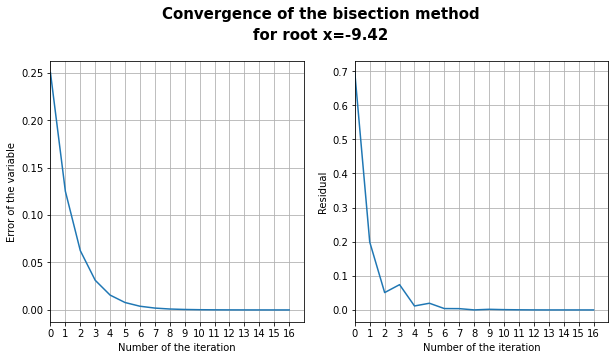

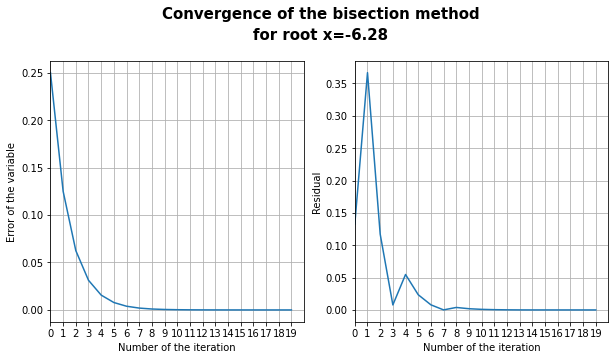

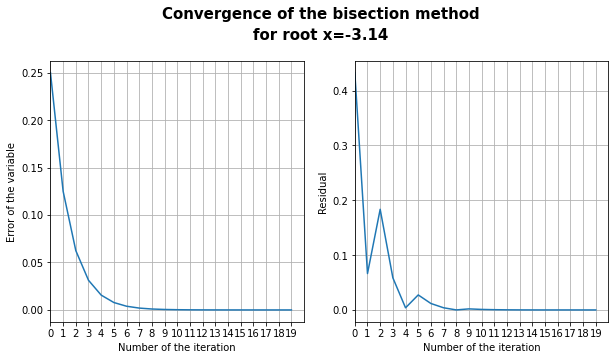

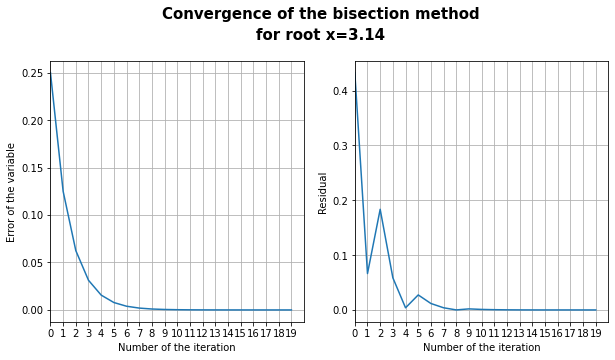

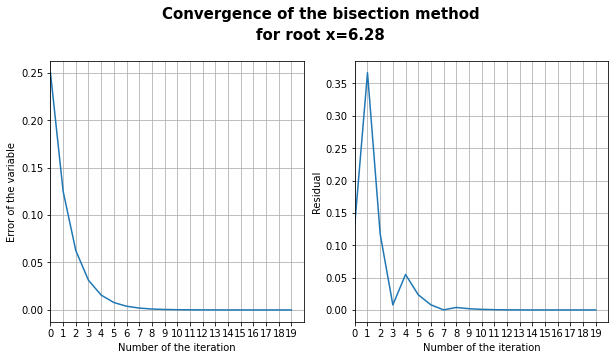

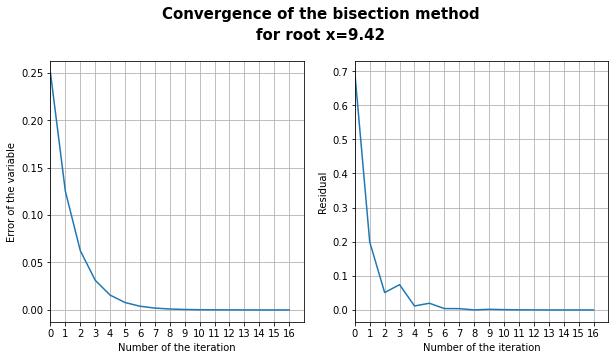

In [ ]:
task_1.find_roots("bisection", plot_graphs=True)
print()

Відповідь: x = 9.424778+-0.000001

7 roots were found
0
-9.424777962988022
-6.283185356708475
-3.141592727984857
3.1415926554589646
6.283185314562671
9.424777961960492



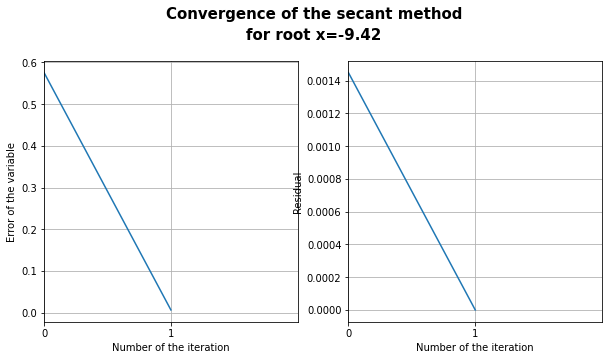

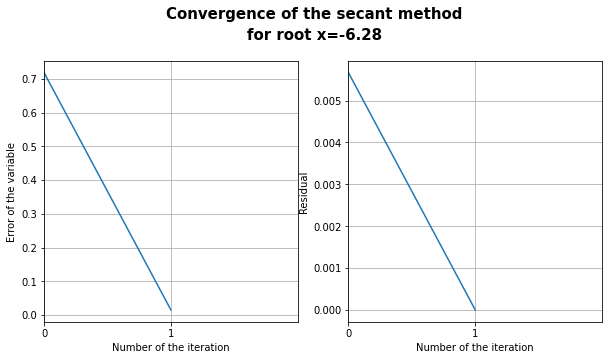

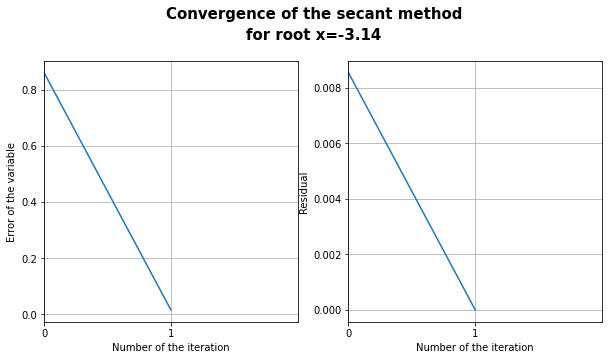

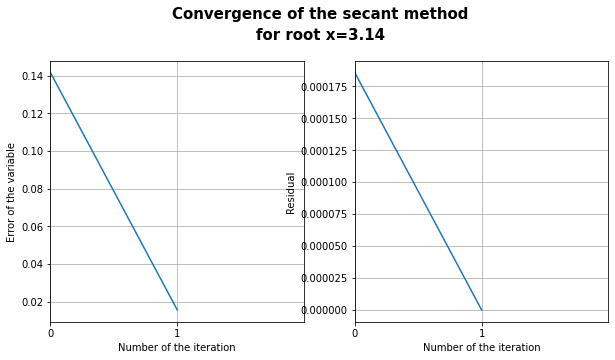

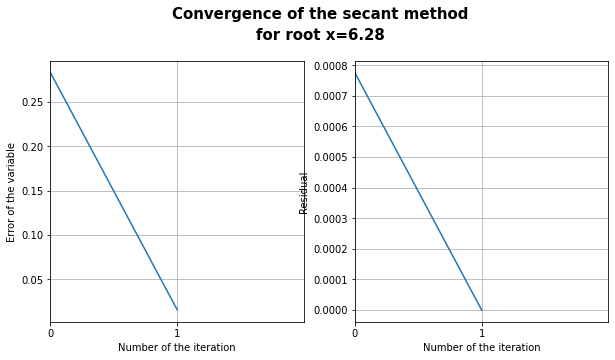

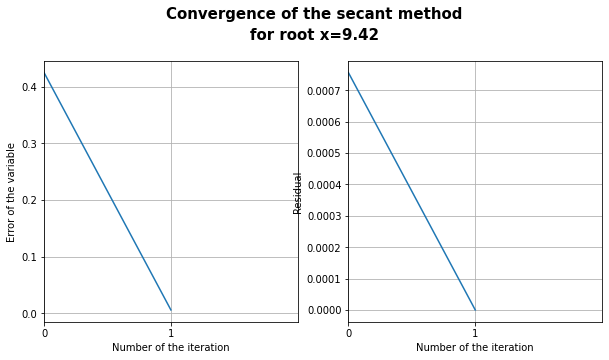

In [ ]:
task_1.find_roots("secant", plot_graphs=True)
print()

In [ ]:
task_1.find_roots("simple_newton")
print()

In [ ]:
task_1.find_roots("hall")
print()